In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

from sklearn.linear_model import *
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn import datasets, linear_model, metrics

In [3]:
df = pd.read_excel("gasoline_price_sentiment_pre-processed_7.xlsx", "Sheet1")

FileNotFoundError: [Errno 2] No such file or directory: 'gasoline_price_sentiment_pre-processed_7.xlsx'

In [ ]:
df.set_index(keys='Date', drop= True, inplace= True)
df.drop('Unnamed: 0', inplace= True, axis= 1)

In [ ]:
df=df.dropna()

In [ ]:
def create_lagged_features(df, col, lag_number = 7):
    
    df[col]=df[col].shift(lag_number)
    
    return(df)

In [ ]:
df.columns

Index(['price', 'popularity', 'general_sentiment', 'positive_outlook',
       'happiness', 'bittersweet', 'confidence', 'disgust', 'disagreement',
       'anxiety', 'gloominess', 'distress', 'violent', 'unexpectedness',
       'timeliness', 'confusion', 'feelingsVsTruth', 'buyVsSell',
       'buyVsSellForecast', 'priceTrend', 'pricePrediction', 'volatile',
       'consumptionCommodity', 'productionCommodity', 'regulatory',
       'supplyDemandBalance', 'supplyDemandBalanceForecast', 'exploration',
       'accidents', 'National_Holiday', 'Weekend', 'Holidays', 'happiness_Log',
       'bittersweet_Log', 'disgust_Log', 'disagreement_Log', 'anxiety_Log',
       'gloominess_Log', 'distress_Log', 'violent_Log', 'unexpectedness_Log',
       'confusion_Log', 'buyVsSell_sqrt', 'pricePrediction_Log',
       'volatile_Log', 'productionCommodity_Log', 'regulatory_Log',
       'supplyDemandBalance_Log', 'exploration_Log', 'accidents_Log',
       'month-1', 'month-2', 'month-3', 'month-4', 'month-5'

In [ ]:
indfeat = ['happiness_Log', 'bittersweet_Log',
       'disgust_Log', 'disagreement_Log', 'anxiety_Log', 'gloominess_Log',
       'distress_Log', 'violent_Log', 'unexpectedness_Log', 'confusion_Log',
       'buyVsSell_sqrt', 'pricePrediction_Log', 'volatile_Log',
       'productionCommodity_Log', 'regulatory_Log', 'supplyDemandBalance_Log',
       'exploration_Log', 'accidents_Log', 'supplyDemandBalanceForecast',
       'consumptionCommodity', 'priceTrend', 'buyVsSellForecast', 'feelingsVsTruth',
       'timeliness', 'confidence', 'popularity', 'general_sentiment', 'positive_outlook','month-1', 'month-2', 'month-3', 'month-4', 'month-5', 'month-6',
       'month-7', 'month-8', 'month-9', 'month-10', 'month-11', 'month-12',
       'dayofweek-0', 'dayofweek-1', 'dayofweek-2', 'dayofweek-3',
       'dayofweek-4', 'dayofweek-5', 'dayofweek-6', 'weekend', 'sunday',
       'price_lag_7', 'price_rm', 'price_ewm']

x = df[indfeat]
y = df['price']

In [ ]:
xlagged = create_lagged_features(x, indfeat, lag_number = 7)
#.reset_index().drop(columns="index", axis=1)
xlagged.head()

,happiness_Log,bittersweet_Log,disgust_Log,disagreement_Log,anxiety_Log,gloominess_Log,distress_Log,violent_Log,unexpectedness_Log,confusion_Log,...,dayofweek-2,dayofweek-3,dayofweek-4,dayofweek-5,dayofweek-6,weekend,sunday,price_lag_7,price_rm,price_ewm
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
xlagged.isna().sum()

happiness_Log                  7
bittersweet_Log                7
disgust_Log                    7
disagreement_Log               7
anxiety_Log                    7
gloominess_Log                 7
distress_Log                   7
violent_Log                    7
unexpectedness_Log             7
confusion_Log                  7
buyVsSell_sqrt                 7
pricePrediction_Log            7
volatile_Log                   7
productionCommodity_Log        7
regulatory_Log                 7
supplyDemandBalance_Log        7
exploration_Log                7
accidents_Log                  7
supplyDemandBalanceForecast    7
consumptionCommodity           7
priceTrend                     7
buyVsSellForecast              7
feelingsVsTruth                7
timeliness                     7
confidence                     7
popularity                     7
general_sentiment              7
positive_outlook               7
month-1                        7
month-2                        7
month-3   

In [ ]:
xlagged=xlagged.dropna()

In [ ]:
x_scaler = StandardScaler()
x_scaled = x_scaler.fit_transform(xlagged)

In [ ]:
len(xlagged)

3273

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y[7:],test_size=0.3, shuffle=False)

<AxesSubplot:xlabel='Date'>

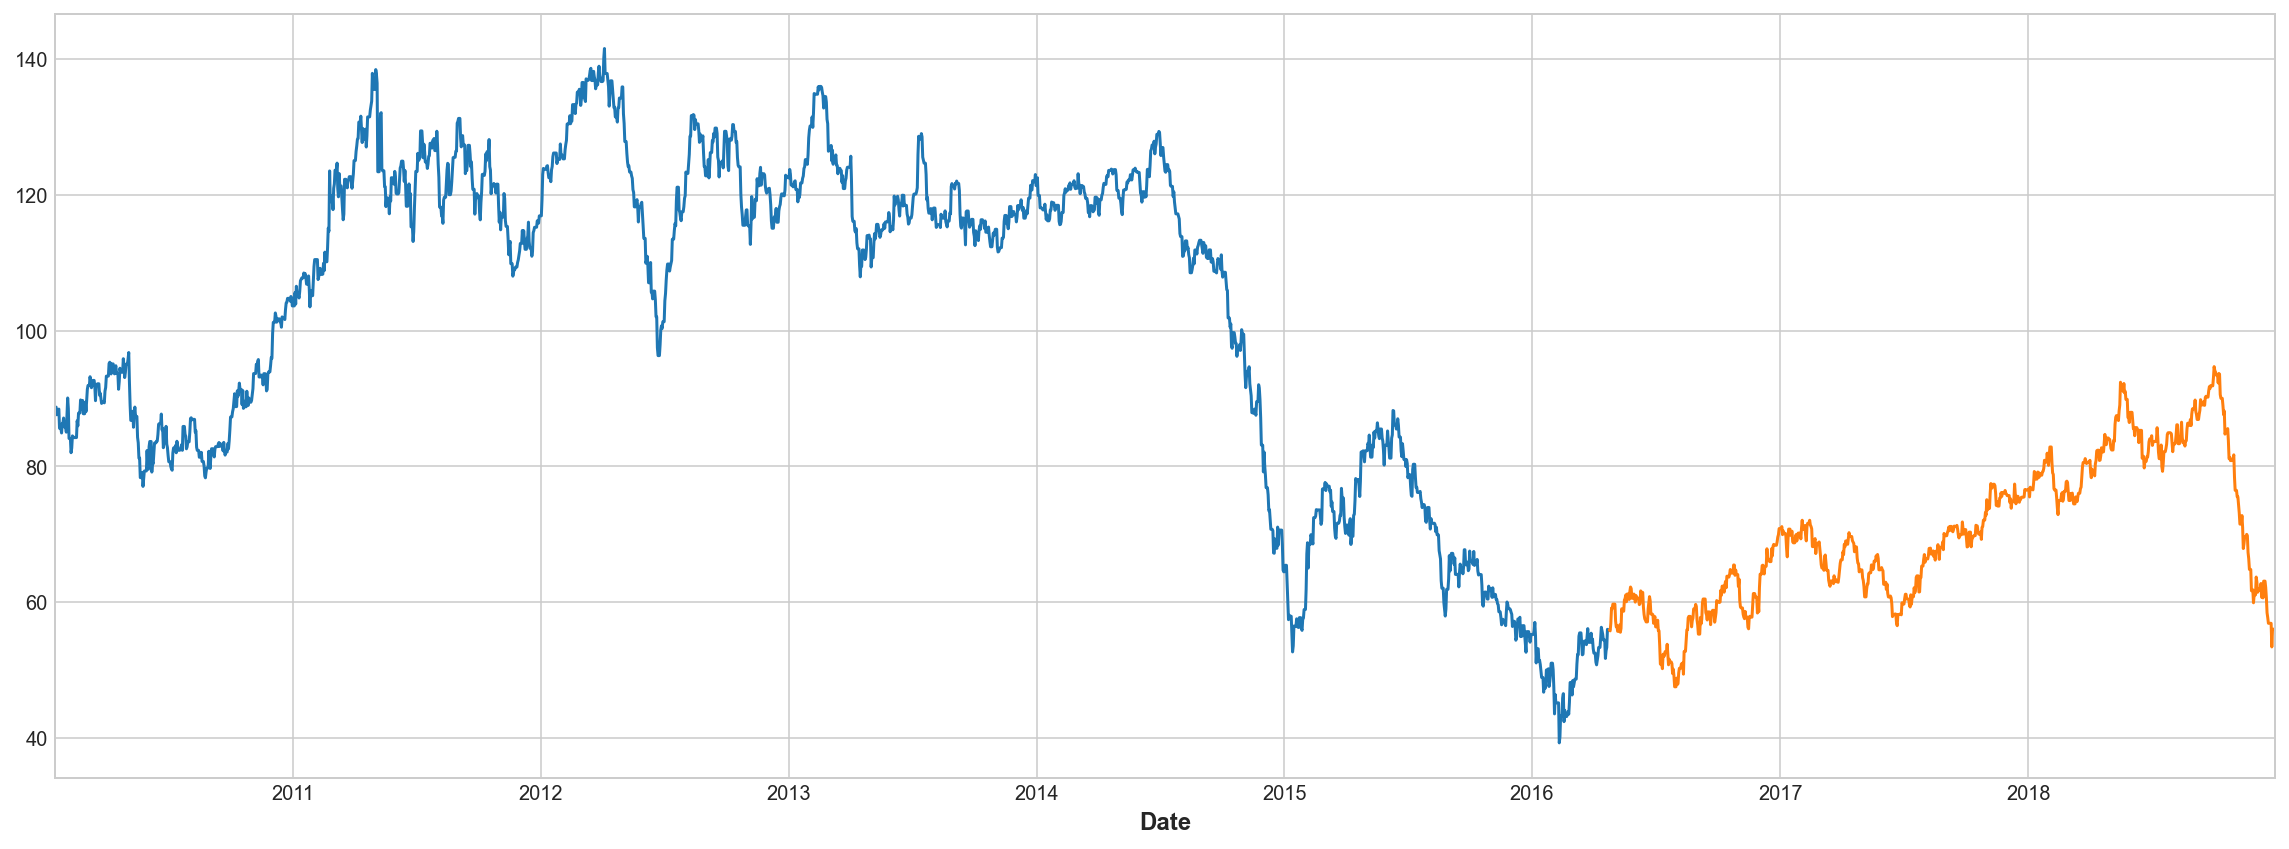

In [ ]:
y_train.plot(label='train', figsize=(16,6))
y_test.plot(label='test')

In [ ]:
# create linear regression object
reg = linear_model.LinearRegression()  
# train the model using the training sets
reg.fit(X_train, y_train)
  
# regression coefficients
print('Coefficients: ', reg.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))


pred_lrTrain = pd.Series(reg.predict(X_train), index = y_train.index)
print("MSE for Train :",mean_squared_error(y_train, pred_lrT, squared=False))

pred_lrTest = pd.Series(reg.predict(X_test), index = y_test.index)
print("MSE for Test :",mean_squared_error(y_test, pred_lr, squared=False))


Coefficients:  [-3.32867805e-02  2.97700603e-02 -4.82500981e-02 -4.37940051e-02
  6.15940358e-02  3.10342051e-02  6.49655156e-02  2.60620420e-01
  3.59646323e-02 -1.43151673e-01  9.32949679e-02  4.57466706e-02
 -9.33234927e-02  3.40972040e-02 -2.26087103e-02 -1.47079139e-02
  1.64462197e-01  1.25961295e-02 -2.78578788e-02  1.02386761e-01
  2.67256472e-01 -7.21527391e-03  3.64748944e-02 -3.89871932e-02
 -8.32201201e-02 -3.15563008e-01  2.84195828e-02 -1.71111119e-02
 -4.72621202e+11 -4.58082990e+11 -4.78105512e+11 -4.71037300e+11
 -4.78105512e+11 -4.71037300e+11 -4.78105512e+11 -4.78105512e+11
 -4.71037300e+11 -4.78105512e+11 -4.71037300e+11 -4.72621202e+11
  1.39820203e+11  1.39695637e+11  1.39695637e+11  1.39695637e+11
  1.39820203e+11  1.08206131e+12 -1.48537260e+12 -1.21629793e+12
  2.56743392e+12 -9.52627434e+00 -4.59971437e+01  8.12795518e+01]
Variance score: 0.9311213349935323
MSE for Train : 3.605080779500476
MSE for Test : 2.792220048047176


<AxesSubplot:xlabel='Date'>

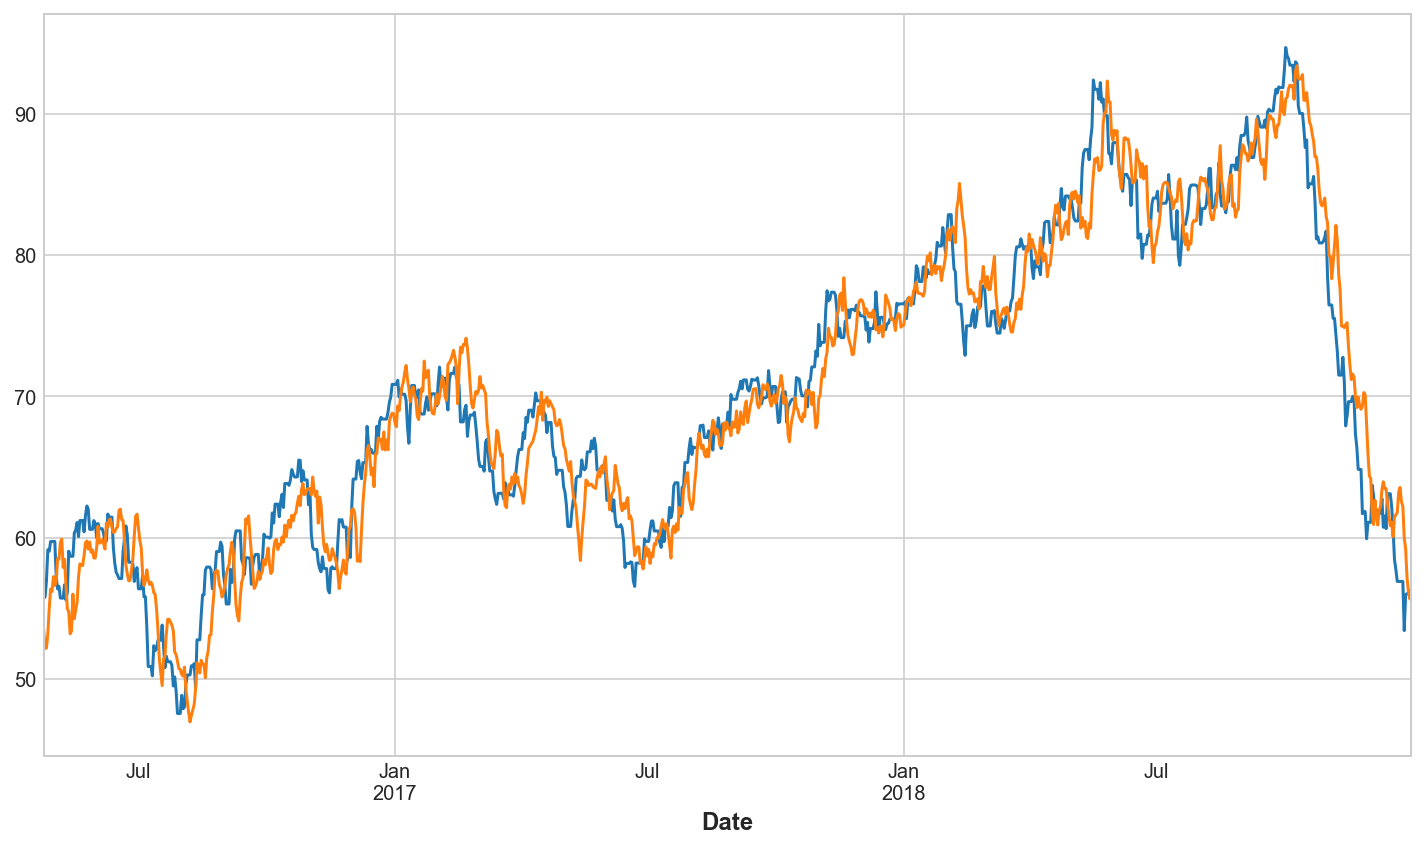

In [ ]:
### PLOT AND COMPARE PREDICTIONS ON TEST SET ###

y_test.plot(label='true', figsize=(10,6))
pred_lr.plot(label='linear_regression')

In [ ]:
# create linear regression object
Las = linear_model.Lasso(alpha=0.1) 
# train the model using the training sets
Las.fit(X_train, y_train)
  
# regression coefficients
print('Coefficients: ', Las.coef_)
  
# variance score: 1 means perfect prediction
print('Variance score: {}'.format(Las.score(X_test, y_test)))


pred_LasTrain = pd.Series(Las.predict(X_train), index = y_train.index)
print("MSE for Train :",mean_squared_error(y_train, pred_LasTrain, squared=False))

pred_lasTest = pd.Series(Las.predict(X_test), index = y_test.index)
print("MSE for Test :",mean_squared_error(y_test, pred_lasTest, squared=False))


NameError: name 'linear_model' is not defined

<AxesSubplot:xlabel='Date'>

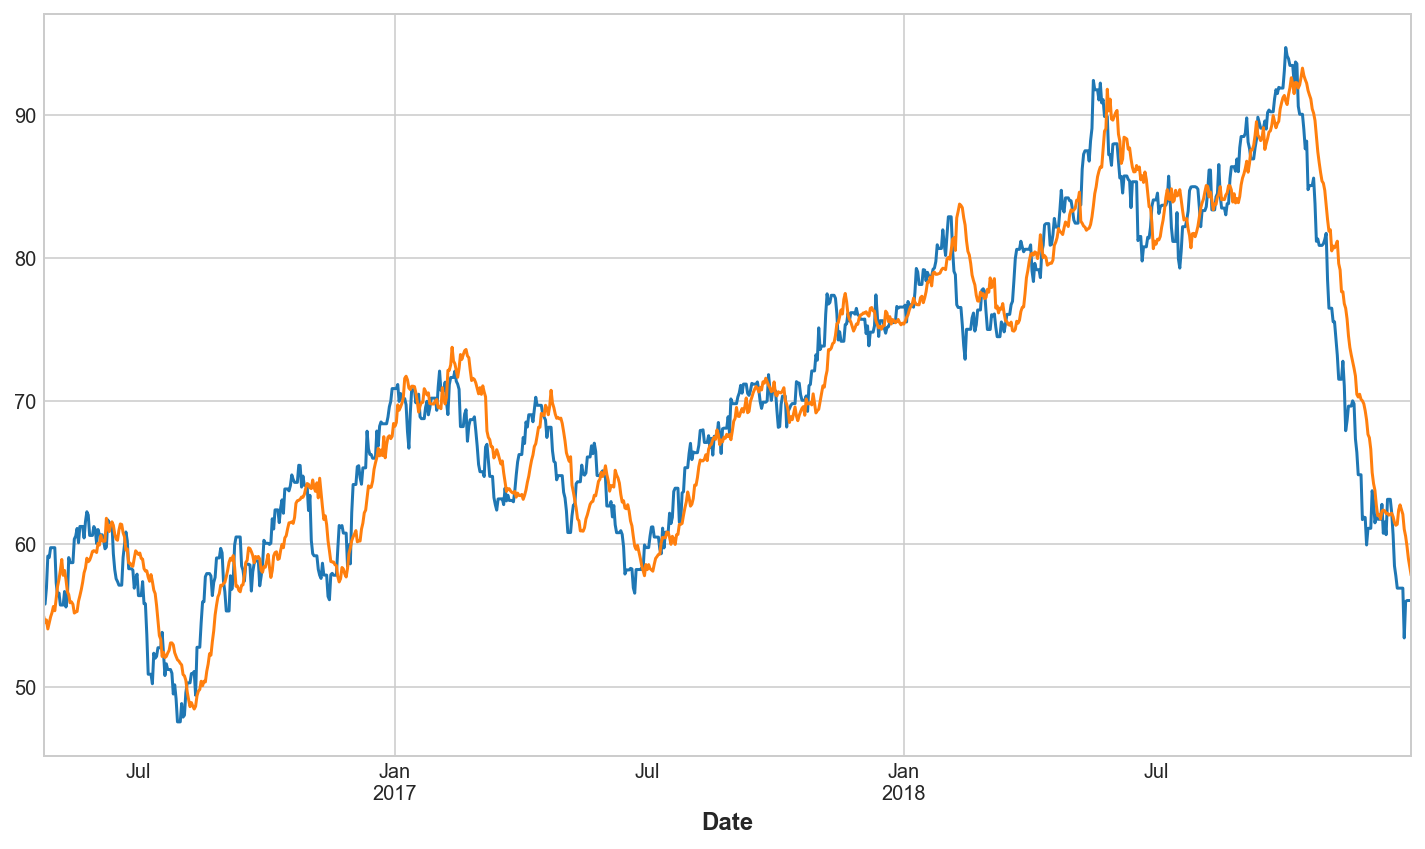

In [ ]:
y_test.plot(label='true', figsize=(10,6))
pred_lasTest.plot(label='linear_regression')